# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

# Import Data

In [2]:
# import dataset
data = pd.read_pickle('./cleaned_data/dummies_user_df.pkl')

In [3]:
data.head()

,user_id,likes_count,replies_count,retweets_count,tweet_ss,target,num_hashtags,avg_convo_ss,avg_day_ss,avg_season_ss,...,Month_3,Month_4,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,PM
0,57,1.666667,0.666667,0.000000,0.450733,0,2.000000,0.450733,0.345007,0.393048,...,0.000000,0.0,0.000000,0.333333,0.0,0.000000,0.0,0.000000,0.0,1.000000
1,59,3.527778,0.694444,0.222222,0.579114,0,2.000000,0.583351,0.347117,0.502371,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.500000
2,76,12.368421,1.526316,0.631579,0.615095,0,3.789474,0.614055,0.354977,0.484822,...,0.052632,0.0,0.000000,0.000000,0.0,0.052632,0.0,0.000000,0.0,0.526316
3,224,6.428571,0.571429,0.714286,0.119571,1,2.000000,0.119571,0.331380,0.321834,...,0.142857,0.0,0.285714,0.000000,0.0,0.142857,0.0,0.000000,0.0,0.857143
4,291,20.666667,1.666667,0.166667,0.198967,1,2.000000,0.198967,0.368641,0.346405,...,0.166667,0.0,0.166667,0.000000,0.0,0.000000,0.0,0.166667,0.0,0.833333


# EDA

Text(0.5, 1.0, 'Correlation Heatmap')

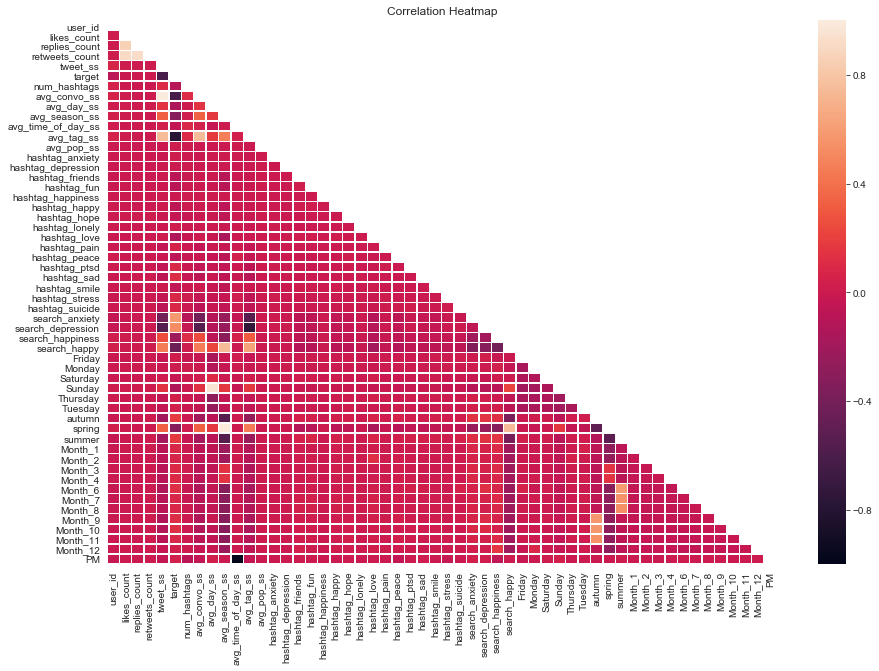

In [5]:
# correlation heatmap of some of the key features in dataframe
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), linewidth=0.5, mask=mask)
plt.title('Correlation Heatmap')

In [10]:
# generate pandas profile of data and output it to html file
profile = pp.ProfileReport(data)
profile.to_file(outputfile="data_profile.html")

In [27]:
# Find all correlations and sort 
correlations = data.corr()['target'].sort_values()

# Print the most negative correlations
print(correlations.head(), '\n')

# Print the most positive correlations
print(correlations.tail())

avg_tag_ss      -0.794099
avg_convo_ss    -0.615393
tweet_ss        -0.614380
search_happy    -0.449986
avg_season_ss   -0.320036
Name: target, dtype: float64 

summer               0.171982
autumn               0.184595
search_depression    0.528309
search_anxiety       0.584295
target               1.000000
Name: target, dtype: float64


In [64]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [65]:
to_drop

['replies_count',
 'retweets_count',
 'avg_convo_ss',
 'avg_tag_ss',
 'search_depression',
 'search_happy',
 'Sunday',
 'spring',
 'PM']

In [66]:
# Drop features 
data.drop(data[to_drop], axis=1, inplace=True)

In [67]:
data.shape

(103209, 45)

In [69]:
data.columns

Index(['user_id', 'likes_count', 'tweet_ss', 'target', 'num_hashtags',
       'avg_day_ss', 'avg_season_ss', 'avg_time_of_day_ss', 'avg_pop_ss',
       'hashtag_anxiety', 'hashtag_depression', 'hashtag_friends',
       'hashtag_fun', 'hashtag_happiness', 'hashtag_happy', 'hashtag_hope',
       'hashtag_lonely', 'hashtag_love', 'hashtag_pain', 'hashtag_peace',
       'hashtag_ptsd', 'hashtag_sad', 'hashtag_smile', 'hashtag_stress',
       'hashtag_suicide', 'search_anxiety', 'search_happiness', 'Friday',
       'Monday', 'Saturday', 'Thursday', 'Tuesday', 'autumn', 'summer',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

In [70]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,103209.0,4.007678e+16,1.834767e+17,57.000000,2.817751e+07,1.239265e+08,4.847247e+08,1.129902e+18
likes_count,103209.0,3.143333e+02,6.492188e+03,0.000000,2.555556e+00,1.033333e+01,4.800000e+01,1.438405e+06
tweet_ss,103209.0,4.237848e-01,4.421882e-01,-0.986900,1.404750e-01,5.719000e-01,7.756500e-01,9.928000e-01
target,103209.0,4.206513e-01,4.936660e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
num_hashtags,103209.0,9.265747e+00,1.367675e+01,0.000000,2.000000e+00,2.500000e+00,1.200000e+01,2.590000e+02
avg_day_ss,103209.0,3.525280e-01,2.912013e-02,0.322150,3.313134e-01,3.428486e-01,3.640690e-01,4.309604e-01
avg_season_ss,103209.0,3.702011e-01,1.256436e-01,0.168943,2.525098e-01,3.771191e-01,5.023708e-01,5.023708e-01
avg_time_of_day_ss,103209.0,3.494931e-01,1.143697e-02,0.336220,3.362202e-01,3.505496e-01,3.648790e-01,3.648790e-01
avg_pop_ss,103209.0,3.498797e-01,1.662565e-16,0.349880,3.498797e-01,3.498797e-01,3.498797e-01,3.498797e-01
hashtag_anxiety,103209.0,3.342894e-05,3.701081e-03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


Text(0.5, 1.0, 'Boxplot of Target Values')

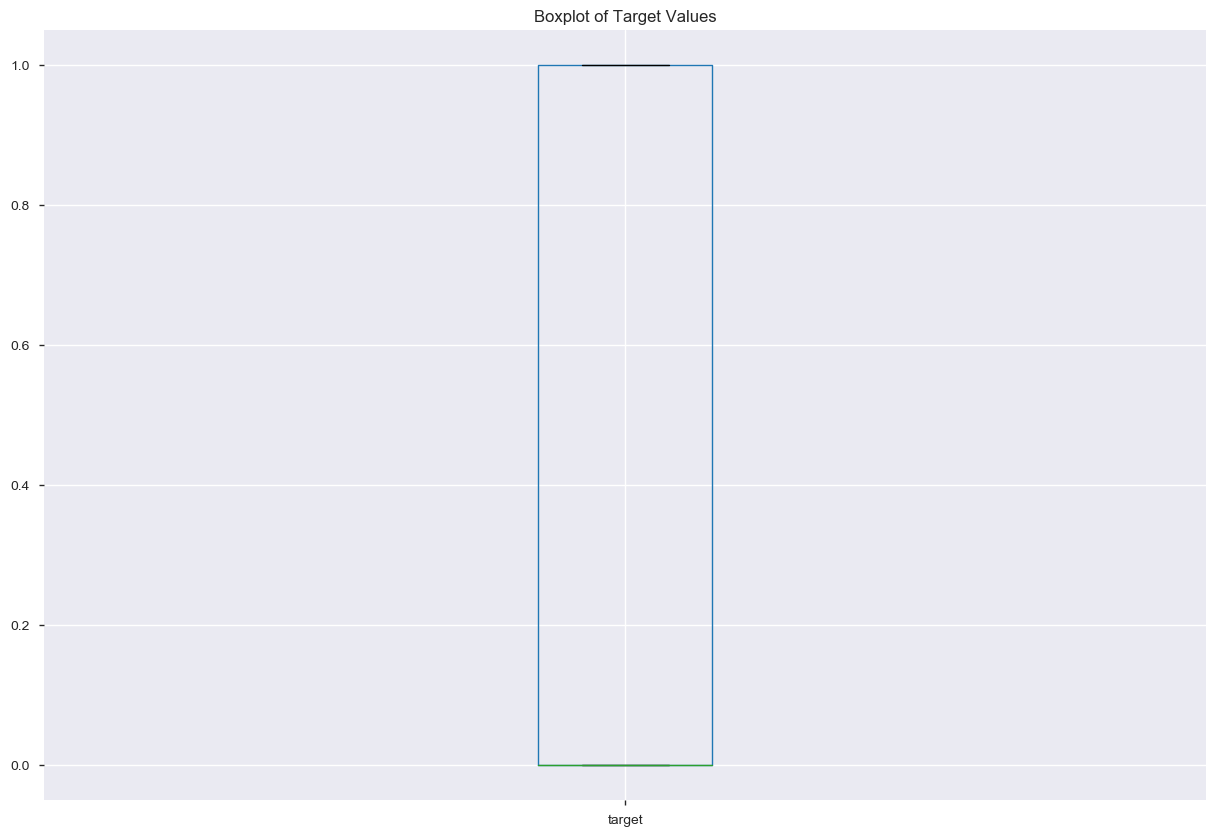

In [68]:
# visualize for outliers of target
plt.figure(figsize=(15,10))
data.boxplot(column='target')
plt.title('Boxplot of Target Values')

Text(0.5, 1.0, 'Boxplot of Likes Count Values')

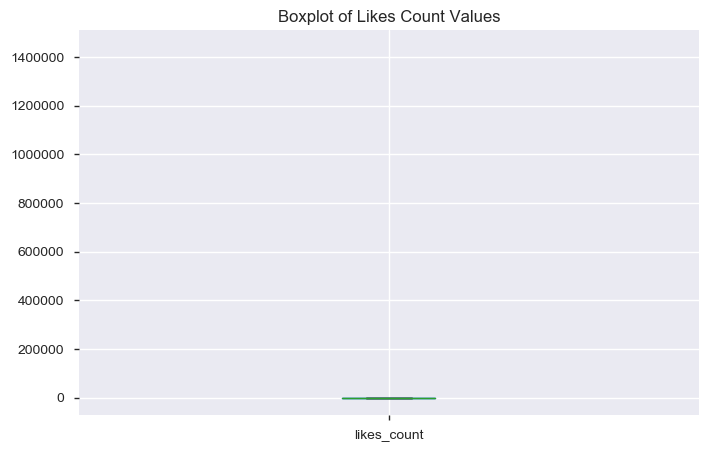

In [73]:
# visualize for outliers of likes count
plt.figure(figsize=(8,5))
data.boxplot(column='likes_count')
plt.title('Boxplot of Likes Count Values')

Text(0.5, 1.0, 'Boxplot of Average User Tweet Sentiment Score Values')

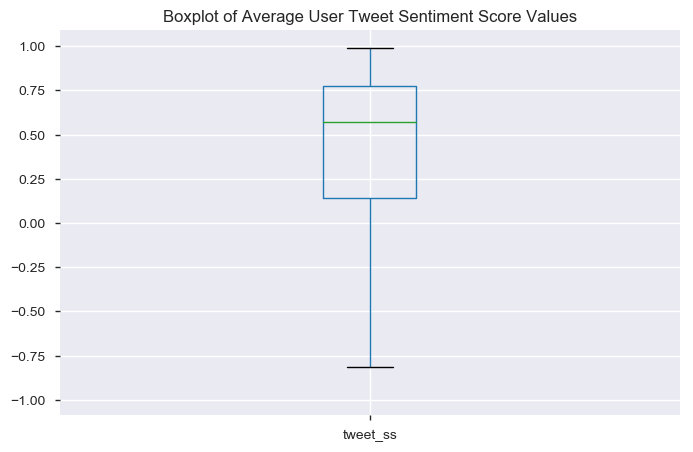

In [74]:
# visualize for outliers of tweets sentiment score (user-level)
plt.figure(figsize=(8,5))
data.boxplot(column='tweet_ss')
plt.title('Boxplot of Average User Tweet Sentiment Score Values')

Text(0.5, 1.0, 'Boxplot of Average Number of Hashtags Per User')

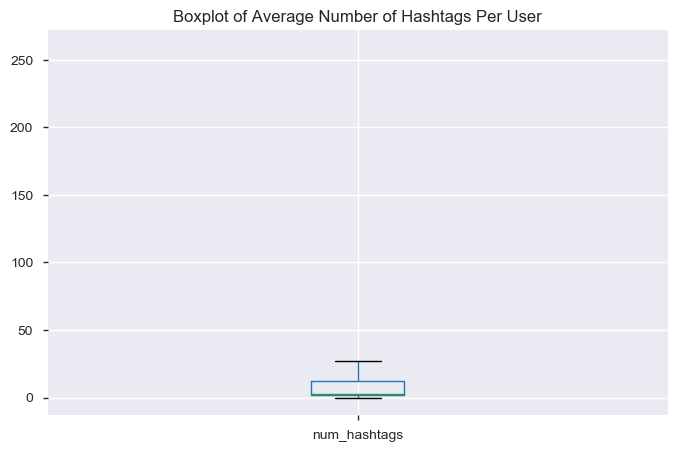

In [77]:
# visualize for outliers of avg number of hashtags per user
plt.figure(figsize=(8,5))
data.boxplot(column='num_hashtags')
plt.title('Boxplot of Average Number of Hashtags Per User')

Text(0.5, 1.0, 'Boxplot of Average User Tweet Sentiment Score Per Day')

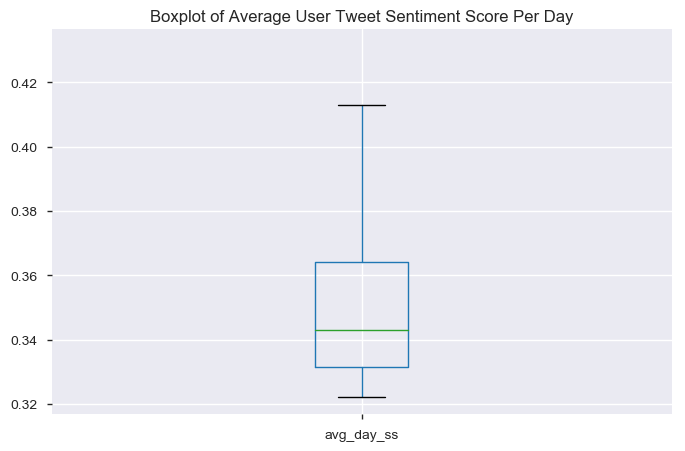

In [78]:
# visualize for outliers of avg user tweet sentiment score per day 
plt.figure(figsize=(8,5))
data.boxplot(column='avg_day_ss')
plt.title('Boxplot of Average User Tweet Sentiment Score Per Day')

Text(0.5, 1.0, 'Boxplot of Average User Sentiment Per Season')

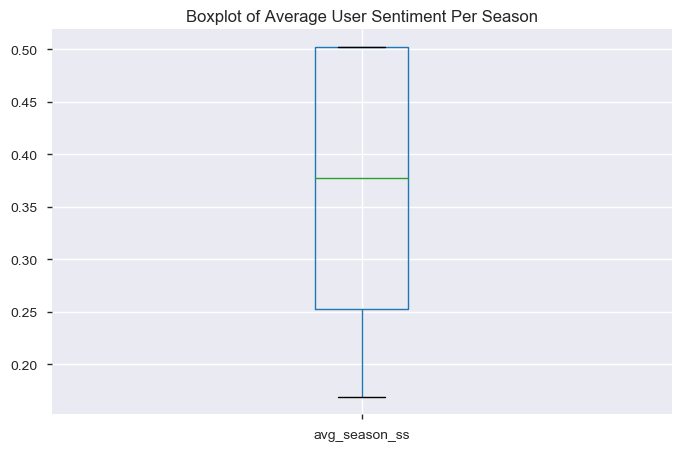

In [80]:
# visualize for outliers of target
plt.figure(figsize=(8,5))
data.boxplot(column='avg_season_ss')
plt.title('Boxplot of Average User Sentiment Per Season')

Text(0.5, 1.0, 'Boxplot of Average User Tweet Sentiment Score Per Time of Day')

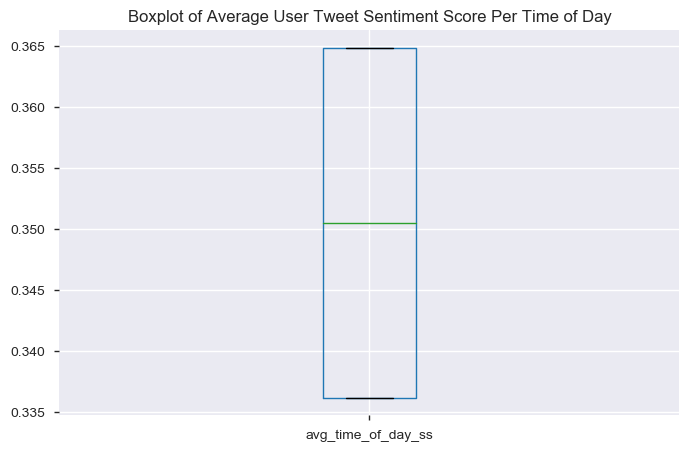

In [81]:
# visualize for outliers of target
plt.figure(figsize=(8,5))
data.boxplot(column='avg_time_of_day_ss')
plt.title('Boxplot of Average User Tweet Sentiment Score Per Time of Day')

Text(0.5, 1.0, 'Boxplot of Average Population Sentiment Score')

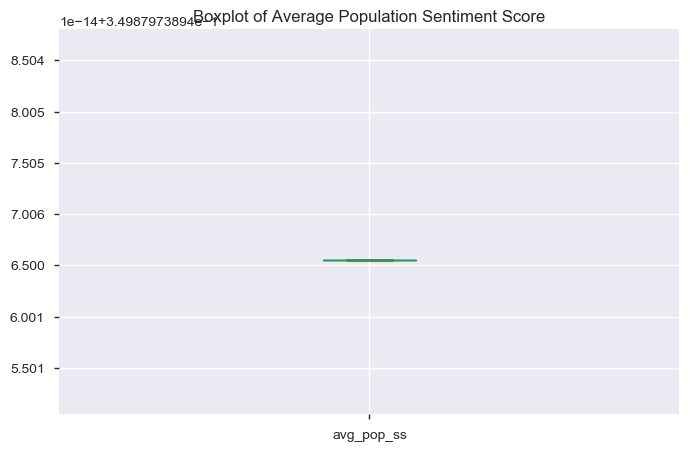

In [82]:
# visualize for outliers of target
plt.figure(figsize=(8,5))
data.boxplot(column='avg_pop_ss')
plt.title('Boxplot of Average Population Sentiment Score')

Text(0.5, 1.0, 'Boxplot of Average Number of Anxiety Hashtag Used Per User')

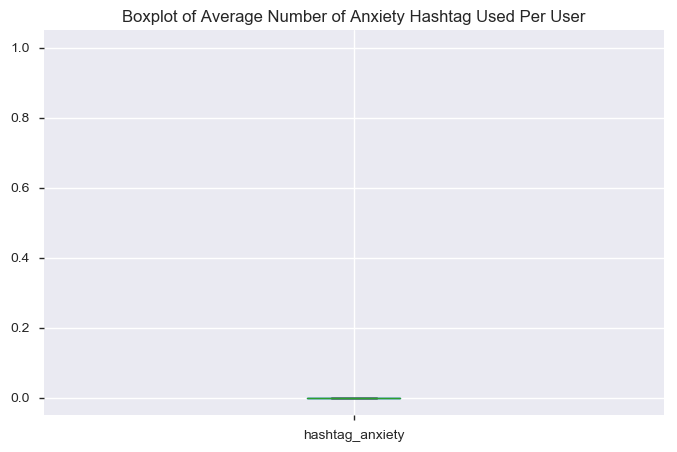

In [83]:
# visualize for outliers of avg number of anxiety hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_anxiety')
plt.title('Boxplot of Average Number of Anxiety Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Depression Hashtag Used Per User')

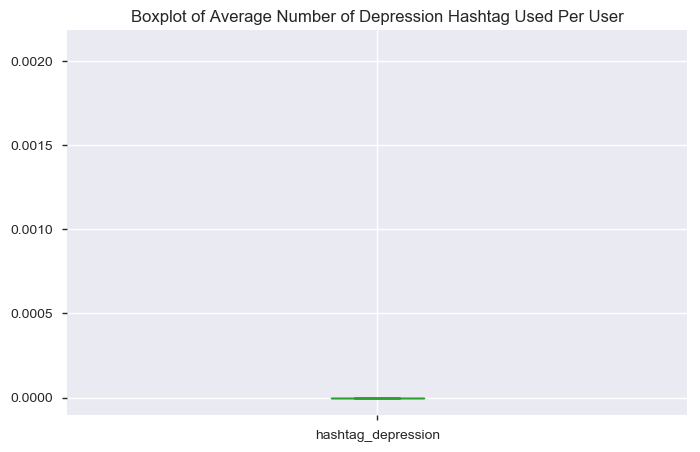

In [84]:
# visualize for outliers of avg number of depression hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_depression')
plt.title('Boxplot of Average Number of Depression Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Friends Hashtag Used Per User')

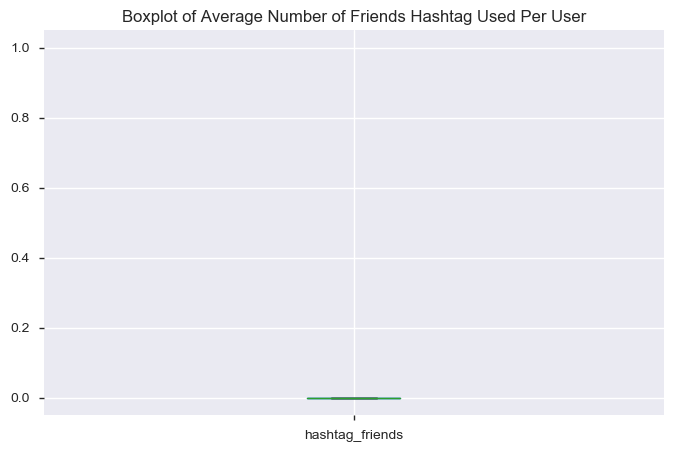

In [85]:
# visualize for outliers of avg number of friends hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_friends')
plt.title('Boxplot of Average Number of Friends Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Fun Hashtag Used Per User')

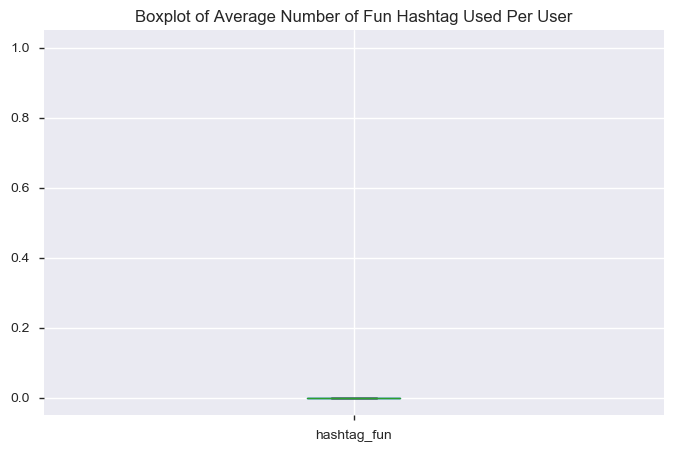

In [86]:
# visualize for outliers of avg number of fun hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_fun')
plt.title('Boxplot of Average Number of Fun Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Happiness Hashtag Used Per User')

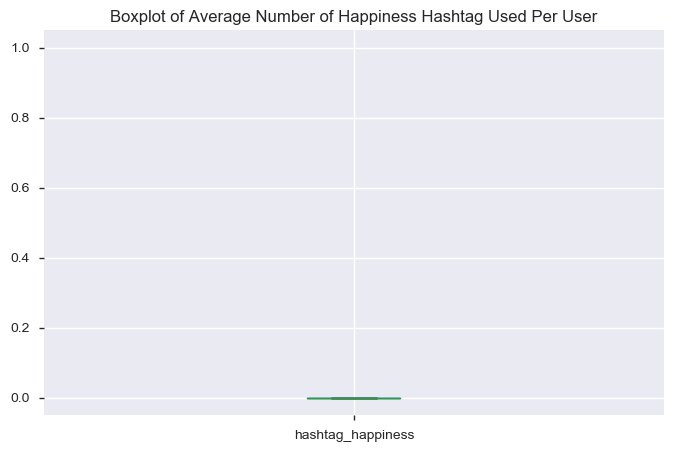

In [87]:
# visualize for outliers of avg number of happiness hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_happiness')
plt.title('Boxplot of Average Number of Happiness Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Happy Hashtag Used Per User')

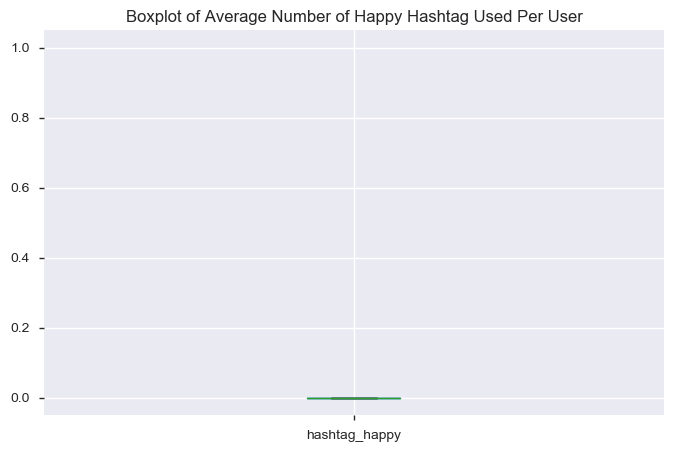

In [88]:
# visualize for outliers of avg number of happy hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_happy')
plt.title('Boxplot of Average Number of Happy Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Hope Hashtag Used Per User')

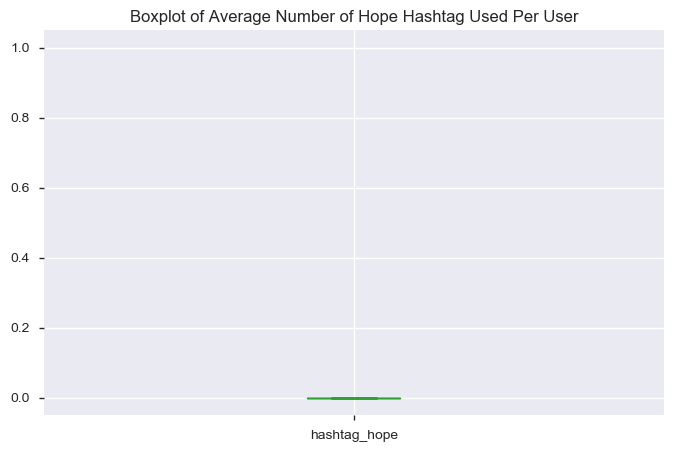

In [89]:
# visualize for outliers of avg number of hope hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_hope')
plt.title('Boxplot of Average Number of Hope Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Lonely Hashtag Used Per User')

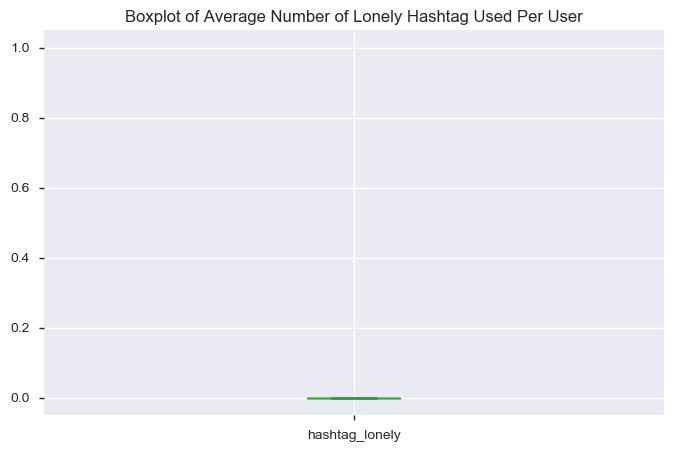

In [90]:
# visualize for outliers of avg number of lonely hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_lonely')
plt.title('Boxplot of Average Number of Lonely Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Love Hashtag Used Per User')

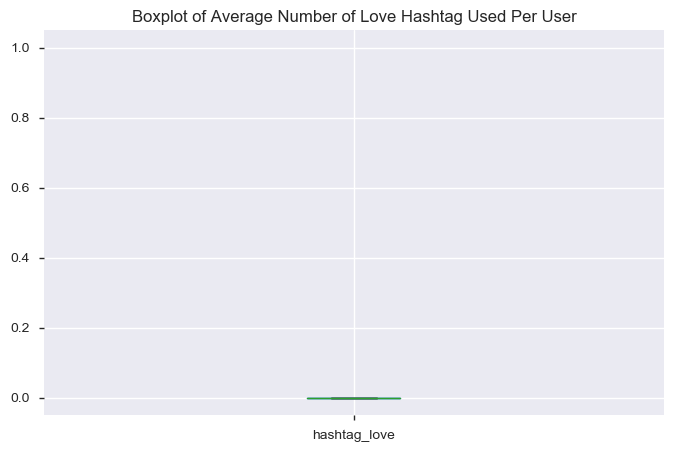

In [91]:
# visualize for outliers of avg number of love hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_love')
plt.title('Boxplot of Average Number of Love Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Pain Hashtag Used Per User')

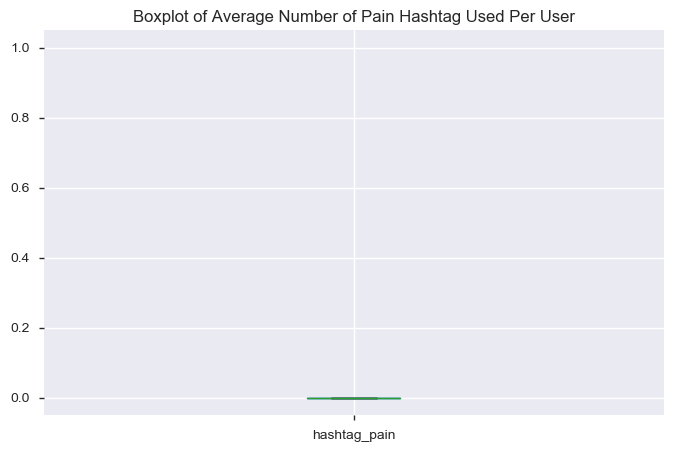

In [92]:
# visualize for outliers of avg number of pain hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_pain')
plt.title('Boxplot of Average Number of Pain Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Peace Hashtag Used Per User')

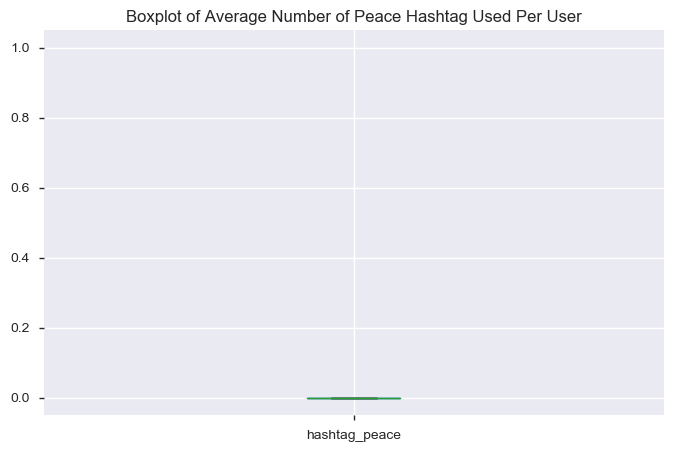

In [93]:
# visualize for outliers of avg number of peace hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_peace')
plt.title('Boxplot of Average Number of Peace Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of PTSD Hashtag Used Per User')

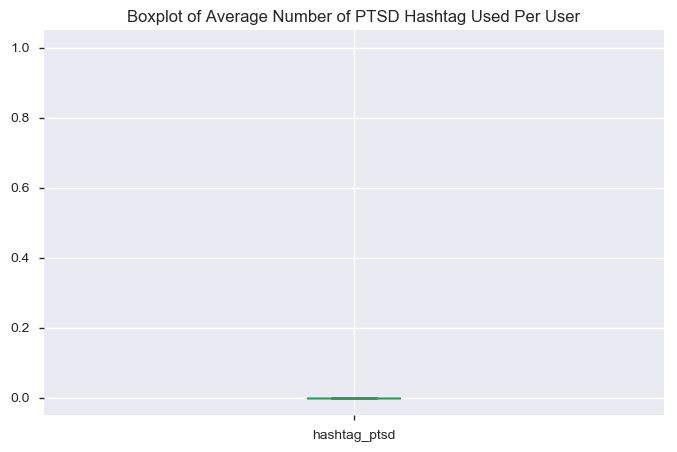

In [94]:
# visualize for outliers of avg number of ptsd hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_ptsd')
plt.title('Boxplot of Average Number of PTSD Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Sad Hashtag Used Per User')

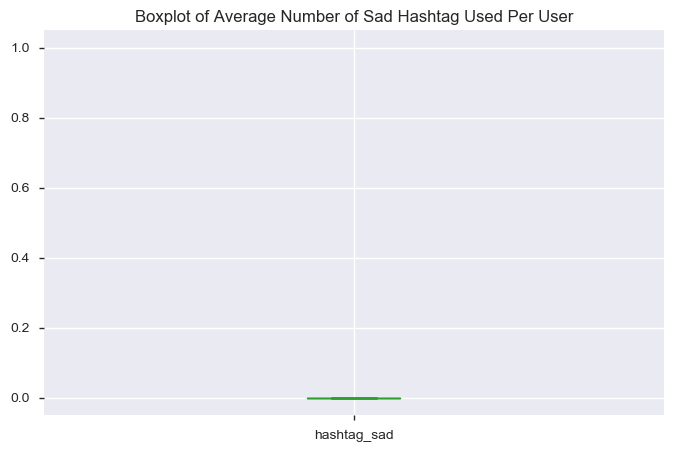

In [95]:
# visualize for outliers of avg number of sad hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_sad')
plt.title('Boxplot of Average Number of Sad Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Smile Hashtag Used Per User')

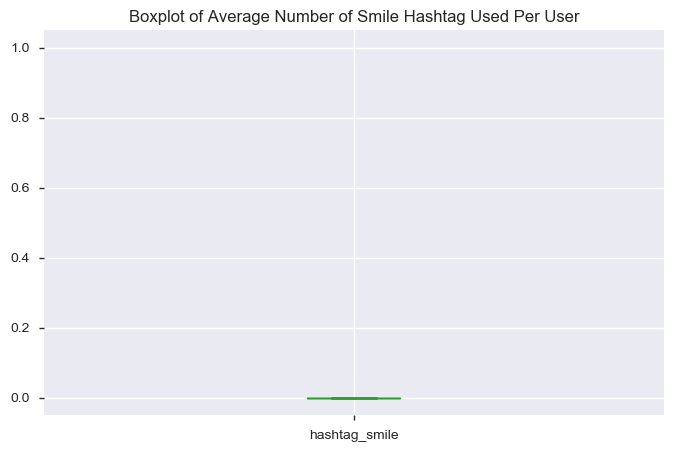

In [99]:
# visualize for outliers of avg number of smile hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_smile')
plt.title('Boxplot of Average Number of Smile Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Stress Hashtag Used Per User')

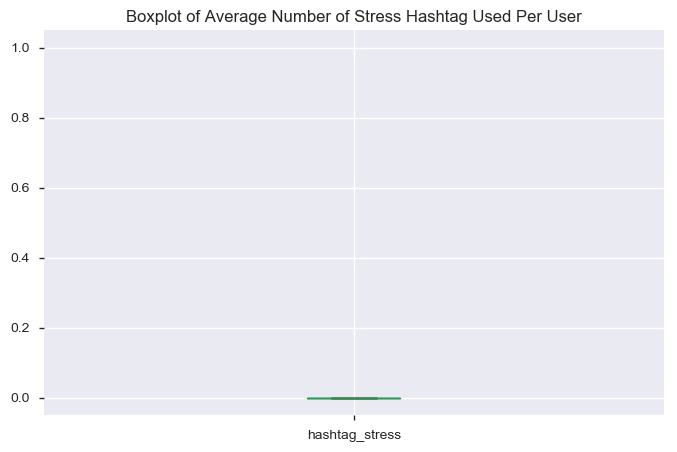

In [97]:
# visualize for outliers of avg number of stress hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_stress')
plt.title('Boxplot of Average Number of Stress Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Suicide Hashtag Used Per User')

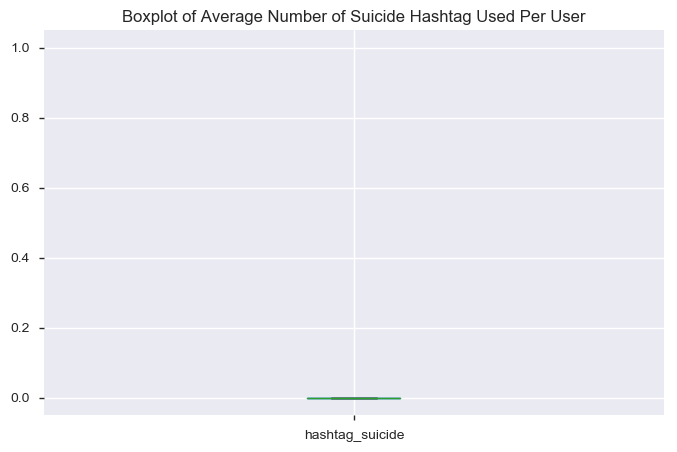

In [98]:
# visualize for outliers of avg number of suicide hashtag used per user
plt.figure(figsize=(8,5))
data.boxplot(column='hashtag_suicide')
plt.title('Boxplot of Average Number of Suicide Hashtag Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Anxiety Search Keyword Used Per User')

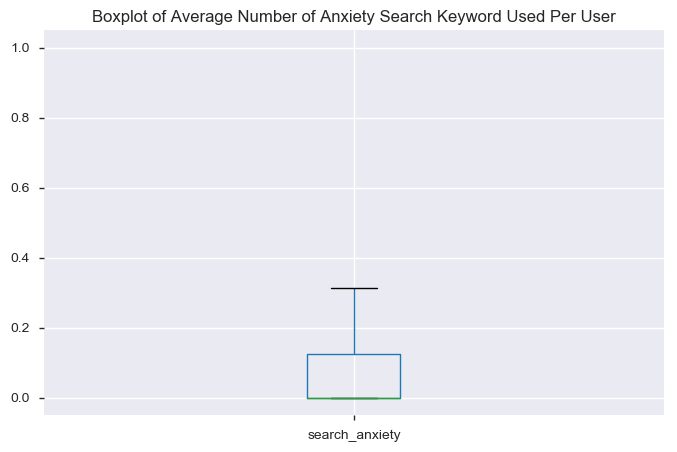

In [101]:
# visualize for outliers of avg number of anxiety search keyword used per user
plt.figure(figsize=(8,5))
data.boxplot(column='search_anxiety')
plt.title('Boxplot of Average Number of Anxiety Search Keyword Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Happiness Search Keyword Used Per User')

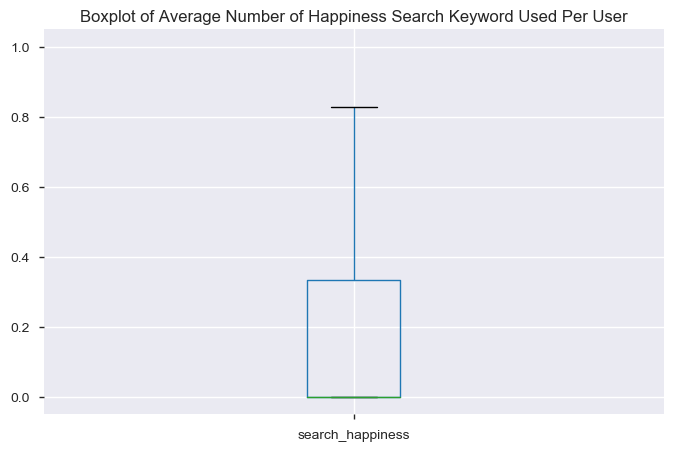

In [102]:
# visualize for outliers of avg number of happiness search keyword used per user
plt.figure(figsize=(8,5))
data.boxplot(column='search_happiness')
plt.title('Boxplot of Average Number of Happiness Search Keyword Used Per User')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User on a Friday')

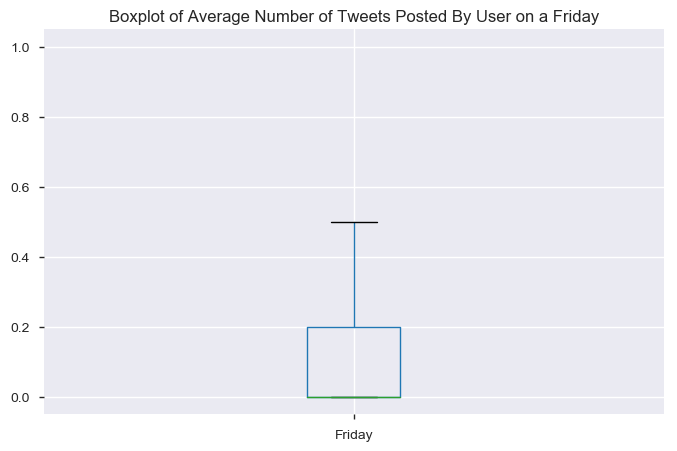

In [103]:
# visualize for outliers of Friday column
plt.figure(figsize=(8,5))
data.boxplot(column='Friday')
plt.title('Boxplot of Average Number of Tweets Posted By User on a Friday')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User on a Monday')

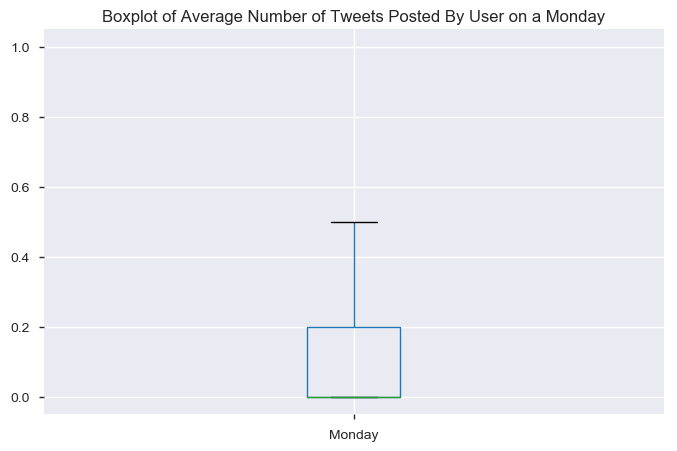

In [104]:
# visualize for outliers of Friday column
plt.figure(figsize=(8,5))
data.boxplot(column='Monday')
plt.title('Boxplot of Average Number of Tweets Posted By User on a Monday')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User on a Saturday')

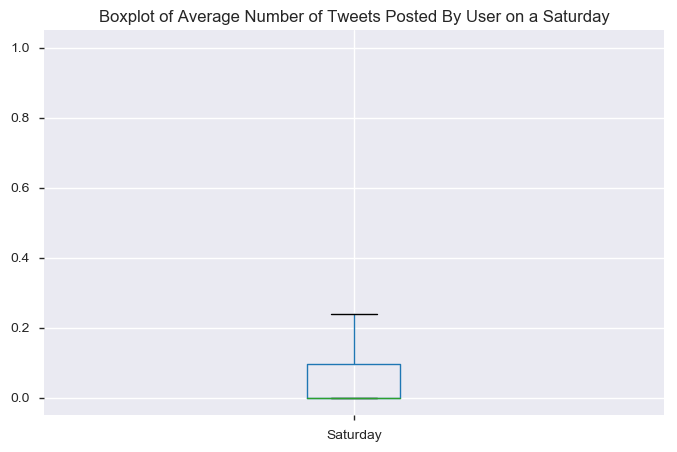

In [105]:
# visualize for outliers of Saturday column
plt.figure(figsize=(8,5))
data.boxplot(column='Saturday')
plt.title('Boxplot of Average Number of Tweets Posted By User on a Saturday')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User on a Thursday')

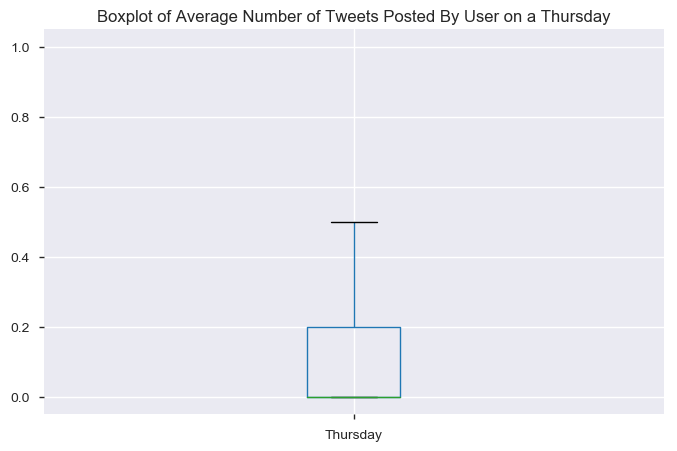

In [106]:
# visualize for outliers of Thursday column
plt.figure(figsize=(8,5))
data.boxplot(column='Thursday')
plt.title('Boxplot of Average Number of Tweets Posted By User on a Thursday')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User on a Tuesday')

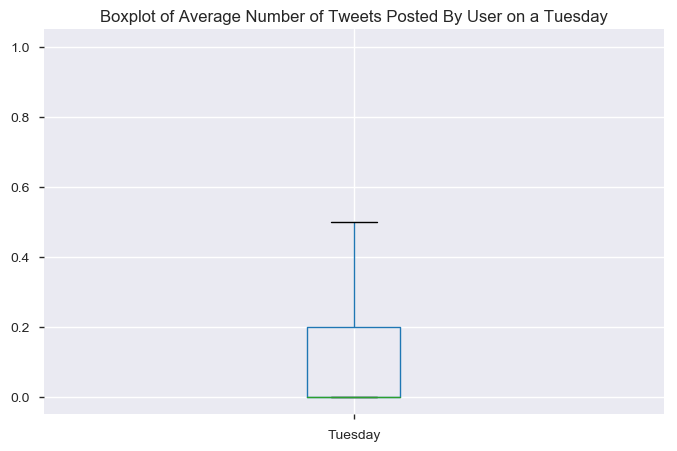

In [108]:
# visualize for outliers of Tuesday column
plt.figure(figsize=(8,5))
data.boxplot(column='Tuesday')
plt.title('Boxplot of Average Number of Tweets Posted By User on a Tuesday')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in Autumn')

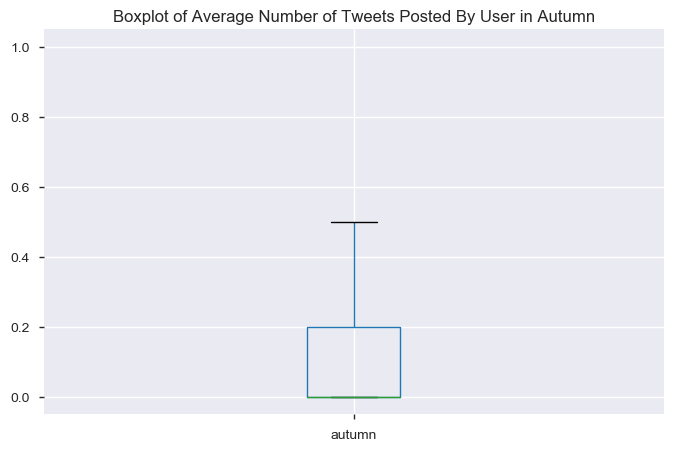

In [109]:
# visualize for outliers of autumn column
plt.figure(figsize=(8,5))
data.boxplot(column='autumn')
plt.title('Boxplot of Average Number of Tweets Posted By User in Autumn')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in Summer')

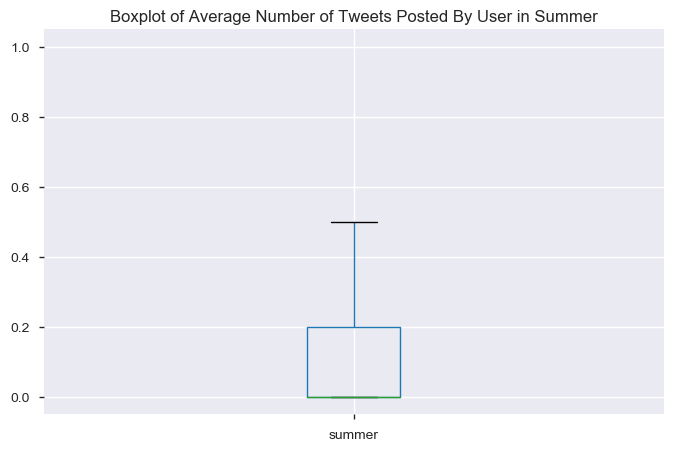

In [110]:
# visualize for outliers of summer column
plt.figure(figsize=(8,5))
data.boxplot(column='summer')
plt.title('Boxplot of Average Number of Tweets Posted By User in Summer')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in January')

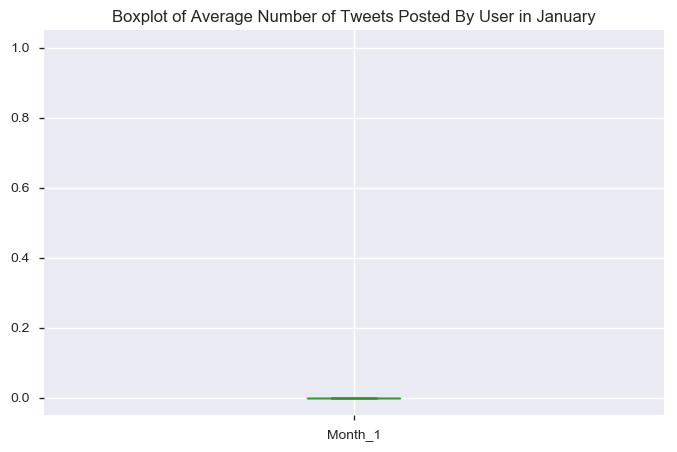

In [111]:
# visualize for outliers of January column
plt.figure(figsize=(8,5))
data.boxplot(column='Month_1')
plt.title('Boxplot of Average Number of Tweets Posted By User in January')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in February')

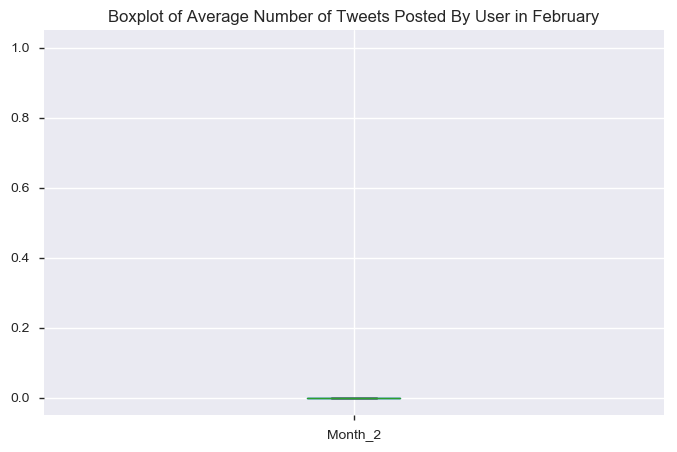

In [112]:
# visualize for outliers of February column
plt.figure(figsize=(8,5))
data.boxplot(column='Month_2')
plt.title('Boxplot of Average Number of Tweets Posted By User in February')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in March')

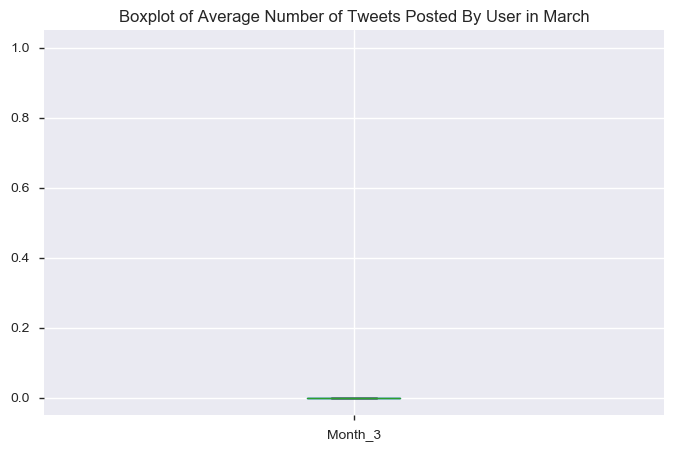

In [113]:
# visualize for outliers of March column
plt.figure(figsize=(8,5))
data.boxplot(column='Month_3')
plt.title('Boxplot of Average Number of Tweets Posted By User in March')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in April')

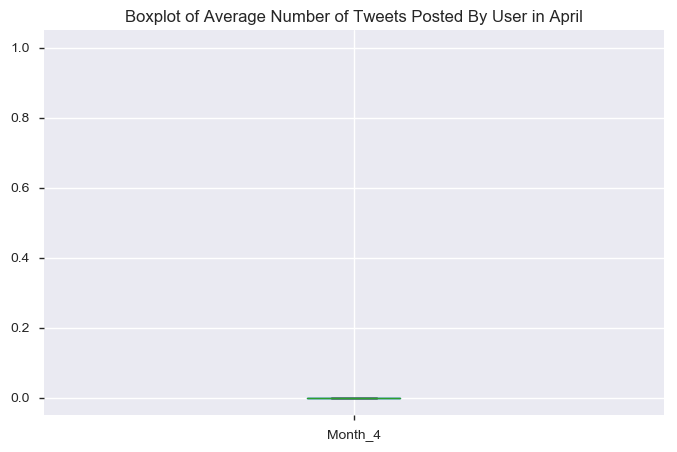

In [114]:
# visualize for outliers of April column
plt.figure(figsize=(8,5))
data.boxplot(column='Month_4')
plt.title('Boxplot of Average Number of Tweets Posted By User in April')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in June')

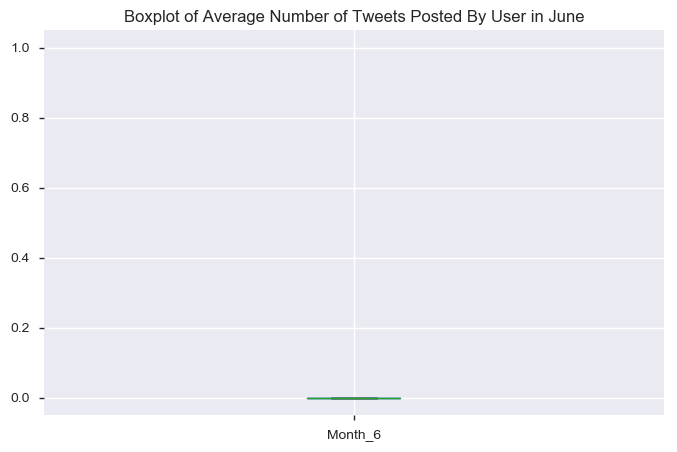

In [115]:
# visualize for outliers of June column
plt.figure(figsize=(8,5))
data.boxplot(column='Month_6')
plt.title('Boxplot of Average Number of Tweets Posted By User in June')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in July')

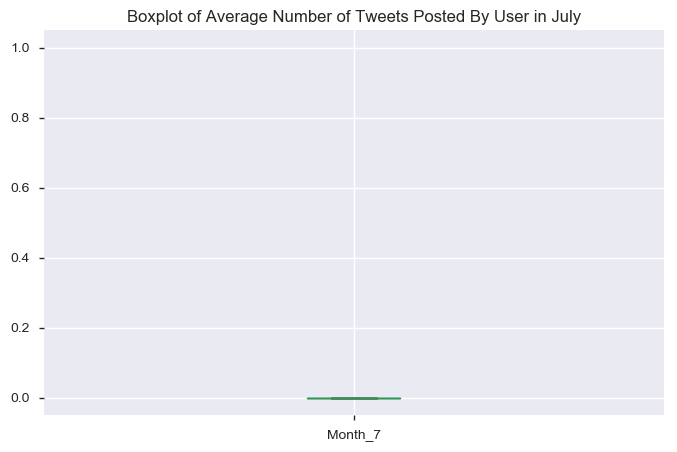

In [116]:
# visualize for outliers of July column
plt.figure(figsize=(8,5))
data.boxplot(column='Month_7')
plt.title('Boxplot of Average Number of Tweets Posted By User in July')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in August')

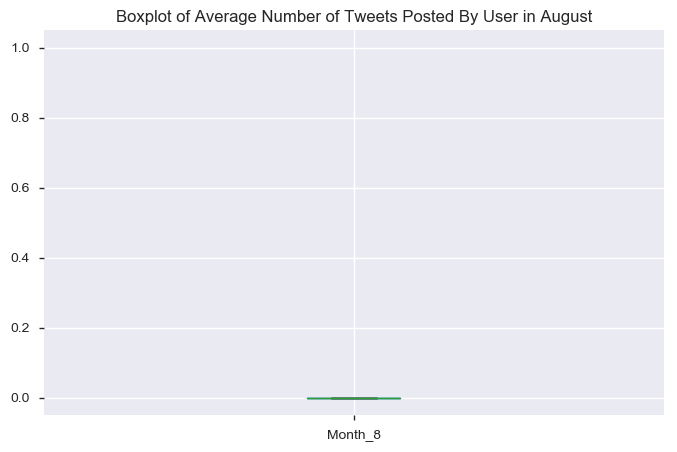

In [117]:
# visualize for outliers of August column
plt.figure(figsize=(8,5))
data.boxplot(column='Month_8')
plt.title('Boxplot of Average Number of Tweets Posted By User in August')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in September')

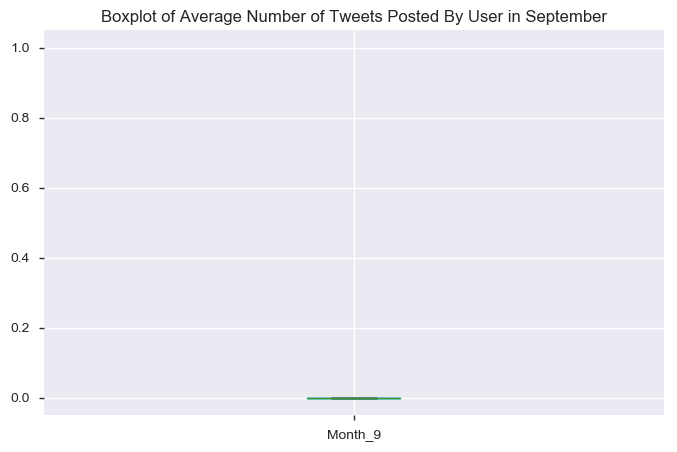

In [118]:
# visualize for outliers of Sept column
plt.figure(figsize=(8,5))
data.boxplot(column='Month_9')
plt.title('Boxplot of Average Number of Tweets Posted By User in September')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in October')

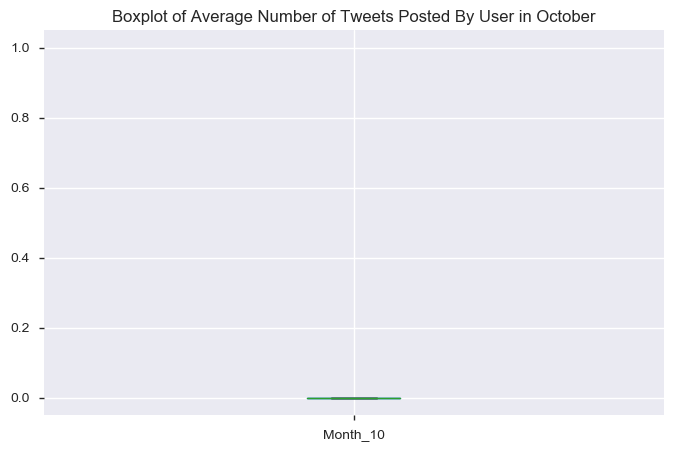

In [119]:
# visualize for outliers of Oct column
plt.figure(figsize=(8,5))
data.boxplot(column='Month_10')
plt.title('Boxplot of Average Number of Tweets Posted By User in October')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in November')

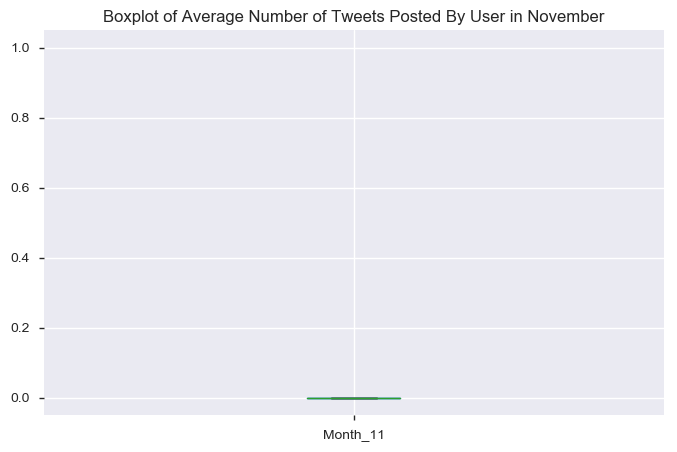

In [120]:
# visualize for outliers of November column
plt.figure(figsize=(8,5))
data.boxplot(column='Month_11')
plt.title('Boxplot of Average Number of Tweets Posted By User in November')

Text(0.5, 1.0, 'Boxplot of Average Number of Tweets Posted By User in December')

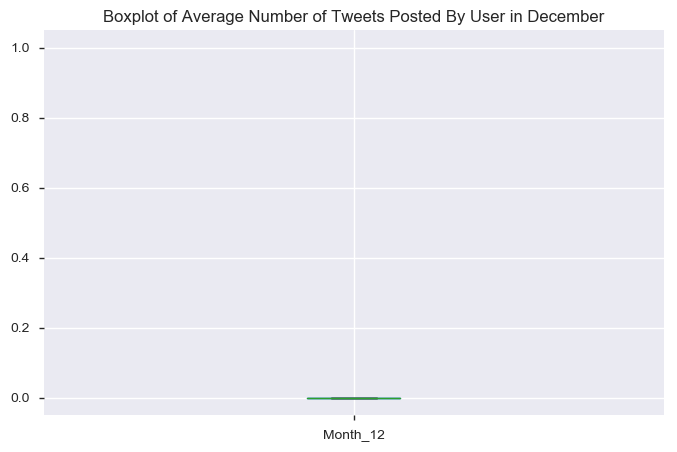

In [121]:
# visualize for outliers of December column
plt.figure(figsize=(8,5))
data.boxplot(column='Month_12')
plt.title('Boxplot of Average Number of Tweets Posted By User in December')

In [122]:
# # pickle updated dataframe after dropping features
# data.to_pickle('./cleaned_data/corr_user_df.pkl')

In [123]:
# create table for heatmap visualization (next step)
pivot = data.pivot_table(index='avg_time_of_day_ss', columns='tweet_ss',values='target')

In [ ]:
# visualizing the grade of each district to number of critical flags
plt.figure(figsize=(20,15))
sns.set_style("darkgrid")
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
pivot_heat = sns.heatmap(pivot, cmap='coolwarm')
pivot_heat.set_ylabel('Avg Tweet Sentiment Score By Time of Day')
pivot_heat.set_xlabel('Avg Sentiment Score of Tweet Posted By User')
pivot_heat.set_title('Heatmap of Overall User Mood Based on Overall Average Tweet Sentiment Score and By Time of Day')